In [76]:
# Import the Pandas, numpy, matplotlib, and Seaborn library
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import DataFrame, Series

# Add items for matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Read the Mushroom Dataset file into a Pandas DataFrame
mushroom_data = pd.read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", sep= ",", header = None)

# Display the DataFrame
mushroom_data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [77]:
# Create a new DataFrame with specific columns from the old DataFrame
mushrooms = mushroom_data.iloc[: , [0, 4, 5, 21, 22]].copy()

#Display the DataFrame
mushrooms.head()

,0,4,5,21,22
0,p,t,p,s,u
1,e,t,a,n,g
2,e,t,l,n,m
3,p,t,p,s,u
4,e,f,n,a,g


In [79]:
# Rename all columns in the mushroom_fin Dataset
mushrooms.columns = ['Mushroom_Class', 'Mushroom_Bruises', 'Mushroom_Odor', 'Mushroom_Population','Mushroom_Habitat']

# Display the DataFrame
mushrooms.head()

,Mushroom_Class,Mushroom_Bruises,Mushroom_Odor,Mushroom_Population,Mushroom_Habitat
0,p,t,p,s,u
1,e,t,a,n,g
2,e,t,l,n,m
3,p,t,p,s,u
4,e,f,n,a,g


In [80]:
# Replace the old values to numerical values:
# Mushroom_Class (old): e = "edible", p = "poisonous" 
# Mushroom_Class (new): e = "0", p = "1"

# Mushroom_Bruises (old): t = "bruises", f = "no-bruises"
# Mushroom_Bruises (new): t = "2", f = "4"

# Mushroom_Odor (old): a = 'almond', l = 'anise', c = 'creosote', y = 'fishy', f = 'foul', m = 'musty', n = 'none', p = 'pungent', s = 'spicy'
# Mushroom_Odor (new): a = '10', l = '20', c = '30', y = '40', f = '50', m = '60', n = '70', p = '80', s = '90'

# Mushroom_Population (old): a = 'abundant', c = 'clustered', n = 'numerous', s = 'scattered', v = 'several', y = 'solitary'
# Mushroom_Population (new): a = '3', c = '6', n = '9', s = '12', v = '15', y = '18'

# Mushroom_Habitat (old): g = 'grasses', l = 'leaves', m = 'meadows', p = 'paths', u = 'urban', w = 'waste', d = 'woods'
# Mushroom_Habitat (new): g = '200', l = '300', m = '400', p = '500', u = '600', w = '700', d = '800'

# Replace the values for Mushroom_Class
mushrooms['Mushroom_Class'] = mushrooms['Mushroom_Class'].replace(['e','p'],['0','1'])

#Replace the values for Mushroom_Bruises
mushrooms['Mushroom_Bruises'] = mushrooms['Mushroom_Bruises'].replace(['t','f'],['2','4'])

#Replace the values for Mushroom_Ordor
mushrooms['Mushroom_Odor'] = mushrooms['Mushroom_Odor'].replace(['a','l','c','y','f','m','n','p','s'],['10','20','30','40','50','60','70','80','90'])

#Replace the values for Mushroom_Population
mushrooms['Mushroom_Population'] = mushrooms['Mushroom_Population'].replace(['a','c','n','s','v','y'],['3','6','9','12','15','18'])

#Replace the values for Mushroom_Habitat
mushrooms['Mushroom_Habitat'] = mushrooms['Mushroom_Habitat'].replace(['g','l','m','p','u','w','d'],['200','300','400','500','600','700','800'])

# Display the DataFrame
mushrooms.head()

,Mushroom_Class,Mushroom_Bruises,Mushroom_Odor,Mushroom_Population,Mushroom_Habitat
0,1,2,80,12,600
1,0,2,10,9,200
2,0,2,20,9,400
3,1,2,80,12,600
4,0,4,70,3,200


In [81]:
# Perform exploratory data analysis: show the distribution of data for each of the columns in the DataFrame.
# Mushroom_Class, Mushroom_Bruises, Mushroom_Odor, Mushroom_Population, Mushroom_Habitat

# 1. Calculate the number of mushrooms that are poisonous and edible in the DataFrame
mushrooms['Mushroom_Class'].value_counts()

0    4208
1    3916
Name: Mushroom_Class, dtype: int64

<AxesSubplot:xlabel='Mushroom_Class', ylabel='Count'>

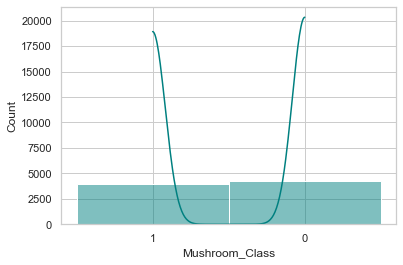

In [82]:
# Plot a histogram to show the comparison between the two classes of Mushrooms (poisonous vs edible)
sns.histplot(data = mushrooms
            ,x = 'Mushroom_Class'
            ,color="teal"
            ,kde = True
            )

In [83]:
#  2. Calculate the number of mushrooms that have bruises and that don't in the DataFrame
mushrooms['Mushroom_Bruises'].value_counts()

4    4748
2    3376
Name: Mushroom_Bruises, dtype: int64

<AxesSubplot:xlabel='Mushroom_Bruises', ylabel='Count'>

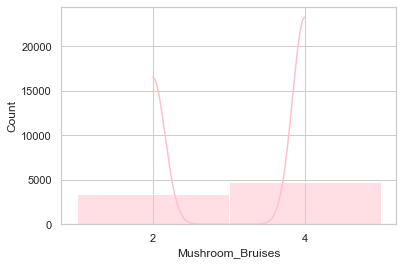

In [84]:
# Plot a histogram to show the mushrooms that have bruises and that don't in the DataFrame
sns.histplot(data = mushrooms
            ,x = 'Mushroom_Bruises'
            ,color="pink"
            ,kde = True
            )

In [85]:
#  3. Calculate the number of mushrooms that have various odors in the DataFrame
mushrooms['Mushroom_Odor'].value_counts()

70    3528
50    2160
40     576
90     576
10     400
20     400
80     256
30     192
60      36
Name: Mushroom_Odor, dtype: int64

<AxesSubplot:xlabel='Mushroom_Odor', ylabel='Count'>

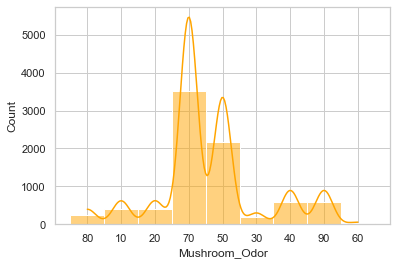

In [86]:
# Plot a histogram to show the number of mushrooms that have various odors in the DataFrame
sns.histplot(data = mushrooms
            ,x = 'Mushroom_Odor'
            ,color="orange"
            ,kde = True
            )

In [87]:
#  4. Calculate the abundance of mushrooms in the DataFrame
mushrooms['Mushroom_Population'].value_counts()

15    4040
18    1712
12    1248
9      400
3      384
6      340
Name: Mushroom_Population, dtype: int64

<AxesSubplot:xlabel='Mushroom_Population', ylabel='Count'>

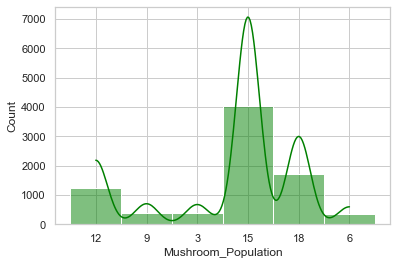

In [88]:
# Plot a histogram to show the abundance of mushrooms
sns.histplot(data = mushrooms
            ,x = 'Mushroom_Population'
            ,color="Green"
            ,kde = True
            )

In [89]:
#  4. Calculate the various habitats of mushrooms in the DataFrame
mushrooms['Mushroom_Habitat'].value_counts()

800    3148
200    2148
500    1144
300     832
600     368
400     292
700     192
Name: Mushroom_Habitat, dtype: int64

<AxesSubplot:xlabel='Mushroom_Habitat', ylabel='Count'>

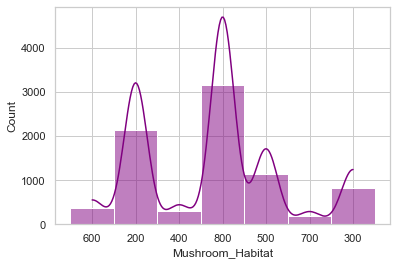

In [90]:
# Plot a histogram to show the abundance of mushrooms
sns.histplot(data = mushrooms
            ,x = 'Mushroom_Habitat'
            ,color="Purple"
            ,kde = True
            )

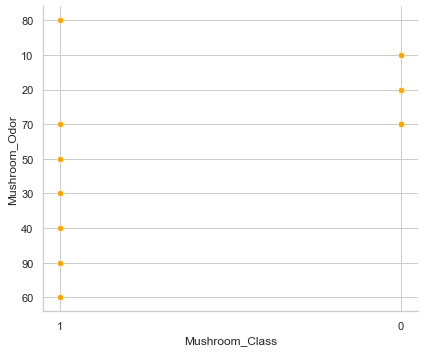

In [119]:
# Plot a Scatterplot of a comparison between Mushroom Class & Mushroom Odor
sns.relplot(data=mushrooms, x='Mushroom_Class', y='Mushroom_Odor', kind='scatter', 
            aspect=1.2, color='orange')

In [120]:
# The plot shows that most poisionous mushrooms have an odor. 
# For example, if a mushroom has a strong odor, e.g. spicy (90) it is more likely to be poisionous. 
# If it has more of a subtle ordor, e.g., almond (10), it is more likely to be edible. 
# Some mushrooms have no odor and can be either spicy or edible(70)

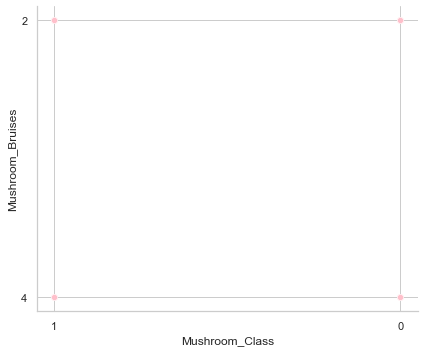

In [121]:
# Plot a Scatterplot of a comparison between Mushroom Class & Mushroom Bruises
sns.relplot(data=mushrooms, x='Mushroom_Class', y='Mushroom_Bruises', kind='scatter', 
            aspect=1.2, color='pink')

In [122]:
# The plot shows that there is almost equal correlation between posisonus vs edible & mushrooms with bruises and those without. 

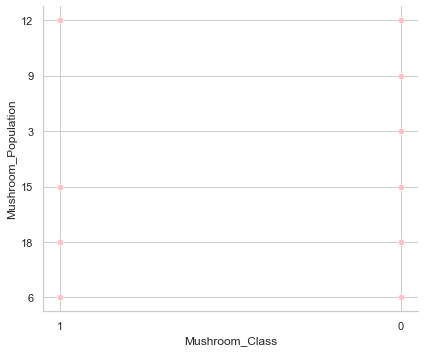

In [123]:
# Plot a Scatterplot of a comparison between Mushroom Class & Mushroom Bruises
sns.relplot(data=mushrooms, x='Mushroom_Class', y='Mushroom_Population', kind='scatter', 
            aspect=1.2, color='pink')

In [124]:
# The plot shows that the population of edible mushroom is greater than the population of poisonous mushrooms.
# For example, edible mushrooms are more abundant(3) and numerous(9) than poisonous mushrooms.

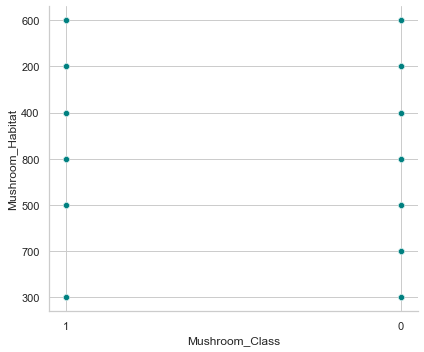

In [125]:
# Plot a Scatterplot of a comparison between Mushroom Class & Mushroom Bruises
sns.relplot(data=mushrooms, x='Mushroom_Class', y='Mushroom_Habitat', kind='scatter', 
            aspect=1.2, color='teal')

In [126]:
# The plot shows that the population of edible mushroom thrive in all habitats listed in the Dataset. 
# For example, edible mushrooms can be found in waste habitats(700) while poisonous mushrooms do not thrive there. 